In [1]:
import numpy as no
import pandas as pd

In [3]:
data_students = pd.read_csv("clean_students_complete.csv")

In [8]:
#data_students.set_index("Student ID", inplace=True)
data_students=data_students.drop(["Unnamed: 0"], axis=1)

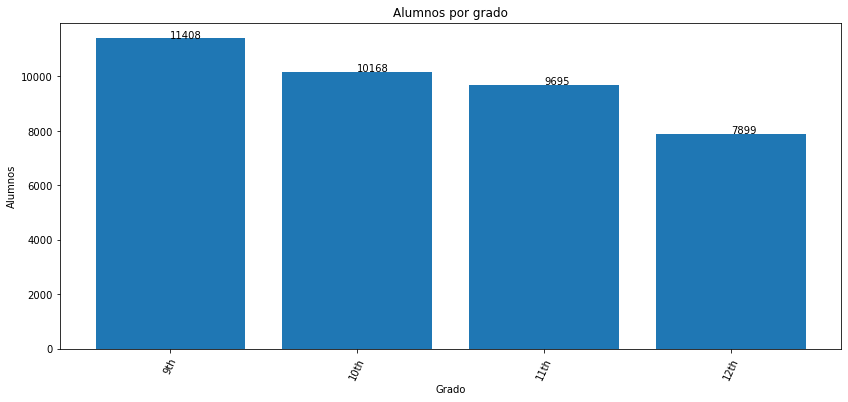

In [40]:
import matplotlib.pyplot as plt

def labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
grades = data_students["grade"].value_counts().rename_axis('grade').reset_index(name='counts')
grades

x=grades["grade"]
y=grades["counts"]
plt.figure(figsize=(14,6))
plt.bar(x,y)
labels(x,y)
plt.title("Alumnos por grado")
plt.xlabel("Grado")
plt.ylabel("Alumnos")
plt.xticks(rotation=65)
plt.show()